In [1]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#import data set
charity = pd.read_csv('Charity.csv')

In [3]:
#checkout my axes
charity.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             45092, 45093, 45094, 45095, 45096, 45097, 45098, 45099, 45100,
             45101],
            dtype='int64', length=45102),
 Index([u'suburb', u'state', u'postcode', u'num_streets', u'RenewalsOrAcq',
        u'collection_amount', u'donation_amount', u'total_received', u'dob',
        u'age', u'weekends'],
       dtype='object')]

In [4]:
#show head
charity.head()

,suburb,state,postcode,num_streets,RenewalsOrAcq,collection_amount,donation_amount,total_received,dob,age,weekends
0,Darwin,NT,801,2,Renewals,315.00,0,315.00,10/10/1943,72,4
1,DARWIN,NT,801,6,Acq,303.55,0,303.55,1/01/1950,65,4
2,PARAP,NT,804,4,Renewals,250.00,0,250.00,8/02/1935,80,4
3,PARAP,NT,804,2,Renewals,28.60,50,78.60,3/10/1958,57,4
4,PARAP,NT,804,2,Renewals,78.00,0,78.00,na,na,4


In [5]:
#describe numeric data
charity.describe()
## note- need to get age working and create binary for renewals/acq

,postcode,num_streets,collection_amount,donation_amount,total_received,weekends
count,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000
mean,3965.124629,2.856747,76.817654,4.059311,80.876965,3.409782
std,1446.307894,2.615003,70.697075,21.337872,70.903512,0.847609
min,801.000000,0.000000,-550.000000,-150.000000,-550.000000,2.000000
25%,2611.000000,1.000000,36.000000,0.000000,40.000000,3.000000
50%,4020.000000,1.000000,60.000000,0.000000,63.000000,4.000000
75%,5043.000000,3.000000,100.000000,0.000000,100.000000,4.000000
max,9726.000000,42.000000,2123.000000,1000.000000,2123.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115794f90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1189d3090>]], dtype=object)

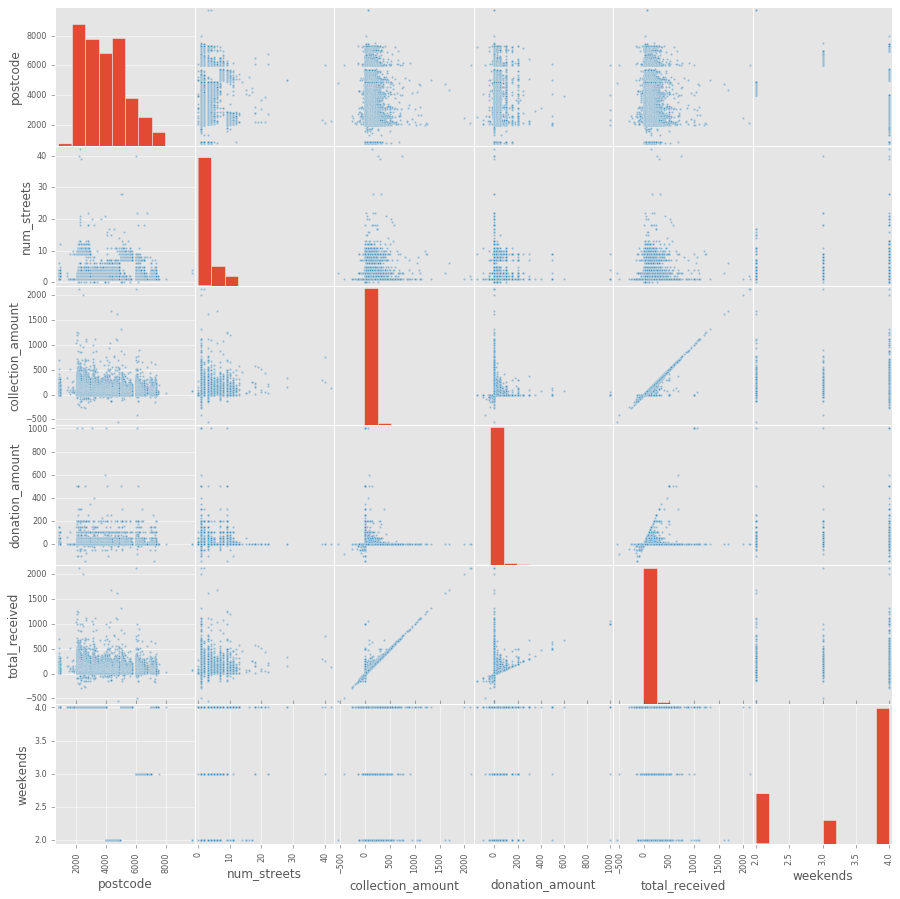

In [6]:
#create scatter matrix
pd.scatter_matrix(charity, figsize=(15,15))

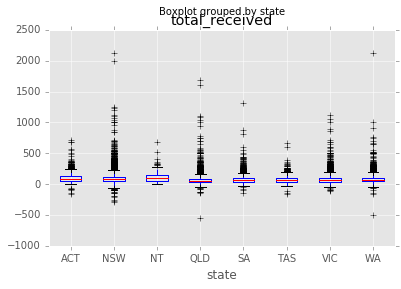

In [7]:
#boxplot try and see some variation by state
charity.boxplot(column='total_received', by='state')

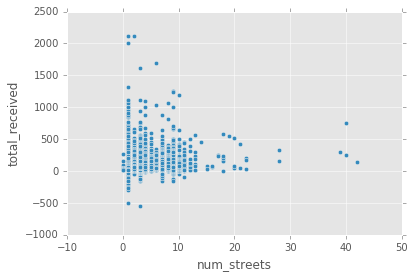

In [8]:
#close up scatter of number of streets and total recieved
charity.plot(kind='scatter', x='num_streets', y='total_received')

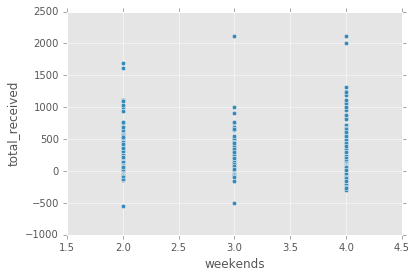

In [9]:
#another look at total_received versus how many collector weekends
charity.plot(kind='scatter', x='weekends', y='total_received')

In [ ]:
Interesting features that jump out:
    1)some clearly correlated features need to be ironed out
    2)number of streets and number of weekends appears interesting but will need to investigate further
    3)age and postcode will be very valuable once prepared for analysis
    4)some negative values for donations will need to understand a bit more

In [ ]:
Regression or Clustering techniques that could be useful?
    1)segment fundraisers by way of k-means clustering - sklearn.cluster.k_means
        Potentially get distinctive audience segments for marketing or comparison etc.
    2) Linear regression/multiple linear regression on donation + age + postcode data (or test all features)
        - sklearn.linear_model.linearregression/ridge/lasso/elasticnet
        Potentially predict the total received based on demographic information only

In [12]:
dummies = pd.get_dummies(charity.state)

In [13]:
charity = pd.concat([charity, dummies], axis=1)

In [14]:
charity.head()

,suburb,state,postcode,num_streets,RenewalsOrAcq,collection_amount,donation_amount,total_received,dob,age,weekends,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
0,Darwin,NT,801,2,Renewals,315.00,0,315.00,10/10/1943,72,4,0,0,1,0,0,0,0,0
1,DARWIN,NT,801,6,Acq,303.55,0,303.55,1/01/1950,65,4,0,0,1,0,0,0,0,0
2,PARAP,NT,804,4,Renewals,250.00,0,250.00,8/02/1935,80,4,0,0,1,0,0,0,0,0
3,PARAP,NT,804,2,Renewals,28.60,50,78.60,3/10/1958,57,4,0,0,1,0,0,0,0,0
4,PARAP,NT,804,2,Renewals,78.00,0,78.00,na,na,4,0,0,1,0,0,0,0,0


In [15]:
dummies = pd.get_dummies(charity.postcode)
charity = pd.concat([charity, dummies], axis=1)
charity.head()

,suburb,state,postcode,num_streets,RenewalsOrAcq,collection_amount,donation_amount,total_received,dob,age,...,7321,7322,7325,7330,7331,7467,7470,7531,8006,9726
0,Darwin,NT,801,2,Renewals,315.00,0,315.00,10/10/1943,72,...,0,0,0,0,0,0,0,0,0,0
1,DARWIN,NT,801,6,Acq,303.55,0,303.55,1/01/1950,65,...,0,0,0,0,0,0,0,0,0,0
2,PARAP,NT,804,4,Renewals,250.00,0,250.00,8/02/1935,80,...,0,0,0,0,0,0,0,0,0,0
3,PARAP,NT,804,2,Renewals,28.60,50,78.60,3/10/1958,57,...,0,0,0,0,0,0,0,0,0,0
4,PARAP,NT,804,2,Renewals,78.00,0,78.00,na,na,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.head()

,suburb,state,postcode,num_streets,RenewalsOrAcq,collection_amount,donation_amount,total_received,dob,age,...,7325,7330,7331,7467,7470,7531,8006,9726,Acq,Renewals
0,Darwin,NT,801,2,Renewals,315.00,0,315.00,10/10/1943,72,...,0,0,0,0,0,0,0,0,0,1
1,DARWIN,NT,801,6,Acq,303.55,0,303.55,1/01/1950,65,...,0,0,0,0,0,0,0,0,1,0
2,PARAP,NT,804,4,Renewals,250.00,0,250.00,8/02/1935,80,...,0,0,0,0,0,0,0,0,0,1
3,PARAP,NT,804,2,Renewals,28.60,50,78.60,3/10/1958,57,...,0,0,0,0,0,0,0,0,0,1
4,PARAP,NT,804,2,Renewals,78.00,0,78.00,na,na,...,0,0,0,0,0,0,0,0,0,1


In [17]:
charity.describe()

,postcode,num_streets,collection_amount,donation_amount,total_received,weekends,ACT,NSW,NT,QLD,...,7325,7330,7331,7467,7470,7531,8006,9726,Acq,Renewals
count,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,...,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000
mean,3965.124629,2.856747,76.817654,4.059311,80.876965,3.409782,0.032548,0.278591,0.004191,0.238282,...,0.000576,0.000355,0.000089,0.000111,0.000022,0.000022,0.000022,0.000044,0.612234,0.387766
std,1446.307894,2.615003,70.697075,21.337872,70.903512,0.847609,0.177453,0.448311,0.064599,0.426037,...,0.024003,0.018832,0.009417,0.010529,0.004709,0.004709,0.004709,0.006659,0.487246,0.487246
min,801.000000,0.000000,-550.000000,-150.000000,-550.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2611.000000,1.000000,36.000000,0.000000,40.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4020.000000,1.000000,60.000000,0.000000,63.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5043.000000,3.000000,100.000000,0.000000,100.000000,4.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9726.000000,42.000000,2123.000000,1000.000000,2123.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


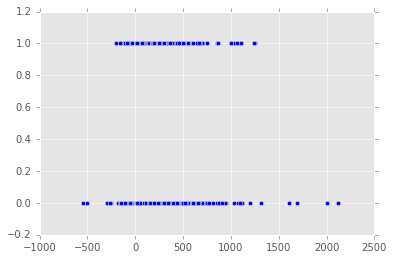

In [22]:
plt.scatter(charity.total_received, charity.Acq)

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['total_received']
X = charity[feature_cols]
y = charity.Acq
logreg.fit(X, y)
Acq_pred_class = logreg.predict(X)

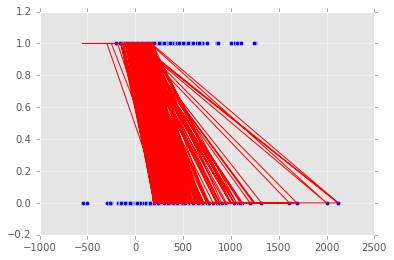

In [26]:
plt.scatter(charity.total_received, charity.Acq)
plt.plot(charity.total_received, Acq_pred_class, color='red')

In [27]:
Acq_pred_prob = logreg.predict_proba(X)[:, 1]
Acq_pred_prob

array([ 0.37451434,  0.38571764,  0.43955501, ...,  0.6690438 ,
        0.62352342,  0.62449775])

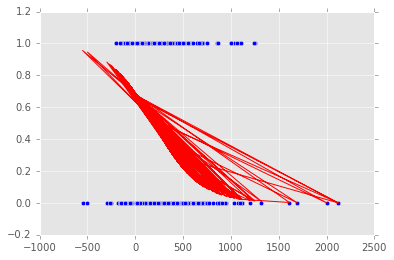

In [28]:
plt.scatter(charity.total_received, charity.Acq)
plt.plot(charity.total_received, Acq_pred_prob, color='red')